# Analysis on Data Science Jobs around The World

Along with the development of technology, data science jobs have become increasingly popular and are in great demand by employers in recent years. The goal of this analysis is to provide data science workers with perspective on the value of their work and skills. Companies could also understand if they could potentially hire scientists from other cities around the world. The dataset we're using in this notebook is retrieved from kaggle. This dataset contains over 60.000 data science job informations, such as job title, city, company, source, link to the job post, etc. from more than 20 countries around the world. 

## Importing Packages & Libraries

First, we'll install and import all the packages & libraries needed for this analysis process.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
import jovian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

## Downloading the Dataset

The dataset we'll be using in this analysis is stored in kaggle website. To get access to the dataset, we'll use the opendatasets method as seen below.

In [3]:
dataset_url = 'https://www.kaggle.com/jonatancr/data-science-jobs-around-the-world' 

In [4]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: theodorehartanto
Your Kaggle Key: ········


100%|██████████| 1.56M/1.56M [00:00<00:00, 66.1MB/s]

The dataset has been downloaded and extracted.

In [5]:
data_science_df = pd.read_csv('data-science-jobs-around-the-world/AIJobsIndustry.csv')

### Quick look at the dataset and its general info (index, columns, non-null data count, datatype)

This step is necessary so we can have a general understanding of the dataset that we'll analyse.

In [6]:
data_science_df.head()

,JobTitle,Company,Location,CompanyReviews,Link
0,NaN,NaN,United States,NaN,https://www.indeed.com/jobs?q=Python+Data&star...
1,Data Science Development Program- Junior Data ...,\n MassMutual,"Amherst, MA 01002",628 reviews,https://www.indeed.com/jobs?q=Python+Data&star...
2,Sr. Data Scientist,\n Catasys,Home Based,6 reviews,https://www.indeed.com/jobs?q=Python+Data&star...
3,Object-oriented Programmer,\n Bank of America,"New York, NY 10281","19,303 reviews",https://www.indeed.com/jobs?q=Python+Data&star...
4,Entry-Level Cognitive / AI / Machine Learning ...,\n IBM,"Austin, TX 73344","18,926 reviews",https://www.indeed.com/jobs?q=Python+Data&star...


In [7]:
data_science_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65670 entries, 0 to 65669
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   JobTitle        56603 non-null  object
 1   Company         23459 non-null  object
 2   Location        65670 non-null  object
 3   CompanyReviews  27705 non-null  object
 4   Link            65670 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB


## Data Preparation and Cleaning

As we've seen from the quick look of the dataset, the current dataset that we have is not ready to be used yet. There are still some missing values and typos that we have to clean in order to make our data analysis more accurate.

### Cleaning rows with null values

We'll be dropping any null values found in the 'JobTitle', 'Company', and 'Location' columns as any null values in those columns will make the information unreliable.

In [8]:
data_science_filtered = data_science_df.copy()

data_science_filtered = data_science_filtered.dropna(subset=['JobTitle'])

In [9]:
data_science_filtered = data_science_filtered.dropna(subset=['Company'])

In [10]:
data_science_filtered = data_science_filtered.dropna(subset=['Location'])

Let's take another look at our dataset's general info after we dropped the null values.

In [11]:
data_science_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23459 entries, 1 to 65666
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   JobTitle        23459 non-null  object
 1   Company         23459 non-null  object
 2   Location        23459 non-null  object
 3   CompanyReviews  23459 non-null  object
 4   Link            23459 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


### Fixing the typo in 'Company' column

If we look at the 'Company' column closely. The values have a little typo at the beginning. So let's remove it.

In [12]:
data_science_filtered['Company'] = data_science_filtered['Company'].map(lambda x: str(x)[5:])
data_science_filtered.head()

,JobTitle,Company,Location,CompanyReviews,Link
1,Data Science Development Program- Junior Data ...,MassMutual,"Amherst, MA 01002",628 reviews,https://www.indeed.com/jobs?q=Python+Data&star...
2,Sr. Data Scientist,Catasys,Home Based,6 reviews,https://www.indeed.com/jobs?q=Python+Data&star...
3,Object-oriented Programmer,Bank of America,"New York, NY 10281","19,303 reviews",https://www.indeed.com/jobs?q=Python+Data&star...
4,Entry-Level Cognitive / AI / Machine Learning ...,IBM,"Austin, TX 73344","18,926 reviews",https://www.indeed.com/jobs?q=Python+Data&star...
6,Healthcare Programmer,Mathematica Policy Research,"Woodlawn, MD",48 reviews,https://www.indeed.com/jobs?q=Python+Data&star...


## Exploratory Analysis and Visualization

With our data ready to be used, in this section we'll start analyzing our dataset and visualize it using various type of graphs.



### Top 10 Most Wanted Data Science Related Jobs

We'll group our data by the 'JobTitle' column, and count how many companies are looking for that job. The result will be assigned into a new dataframe so it'll be easier to focus on analyzing the result.

In [13]:
most_common_jobs = data_science_filtered.groupby(["JobTitle"]).Company.count()
most_common_jobs = most_common_jobs.reset_index(name="Company")
most_common_jobs = most_common_jobs.sort_values(["Company"], ascending=False)
most_common_jobs = most_common_jobs.head(10)

In [14]:
most_common_jobs = most_common_jobs.reset_index()
most_common_jobs = most_common_jobs.drop(['index'], axis=1)

Here we have our "top 10 most wantes data science related jobs" data in dataframe form

In [15]:
most_common_jobs 

,JobTitle,Company
0,Data Scientist,638
1,Data Analyst,198
2,Software Engineer,191
3,Data Engineer,163
4,Business Analyst,103
5,Big Data Engineer,77
6,Senior Data Scientist,75
7,Senior Engineer - DevOps,58
8,"Director, Data & Analytics",56
9,Project Manager,54


And here is the "top 10 most wantes data science related jobs" data visualized in bar plot form

Text(0, 0.5, 'Job Titles')

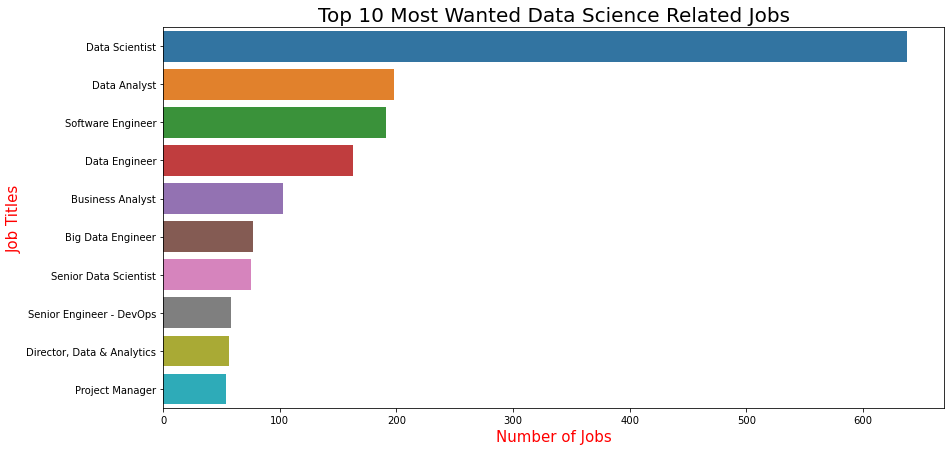

In [16]:
fig, bars=plt.subplots(figsize=(14,7))
bars = sns.barplot(data=most_common_jobs, x="Company", y="JobTitle", orient='h')
bars.set_title("Top 10 Most Wanted Data Science Related Jobs", fontsize=20)
bars.set_xlabel("Number of Jobs", fontsize=15, color="red")
bars.set_ylabel("Job Titles", fontsize=15, color="red")

### Top 10 Companies with The Most Job Offers

We'll group the data by the 'Company' column, and count how many jobs they're offering. The result will be assigned into a new dataframe as well.

In [17]:
companies_with_more_jobs = data_science_filtered.groupby(["Company"]).JobTitle.count()
companies_with_more_jobs = companies_with_more_jobs.reset_index(name="JobTitle")
companies_with_more_jobs = companies_with_more_jobs.sort_values(["JobTitle"], ascending=False)
companies_with_more_jobs = companies_with_more_jobs.head(10)

In [18]:
companies_with_more_jobs = companies_with_more_jobs.reset_index()
companies_with_more_jobs = companies_with_more_jobs.drop(['index'], axis=1)

Here is the "Top 10 Companies with The Most Job Offers" in dataframe form.

In [19]:
companies_with_more_jobs

,Company,JobTitle
0,Google,674
1,Amazon.com,527
2,Accenture,406
3,IBM,406
4,Microsoft,385
5,Oracle,352
6,Qatar Computing Research Institute,343
7,Intel,292
8,PwC,217
9,McKinsey & Company,196


And here is the visualization in bar plot form

Text(0, 0.5, 'Companies')

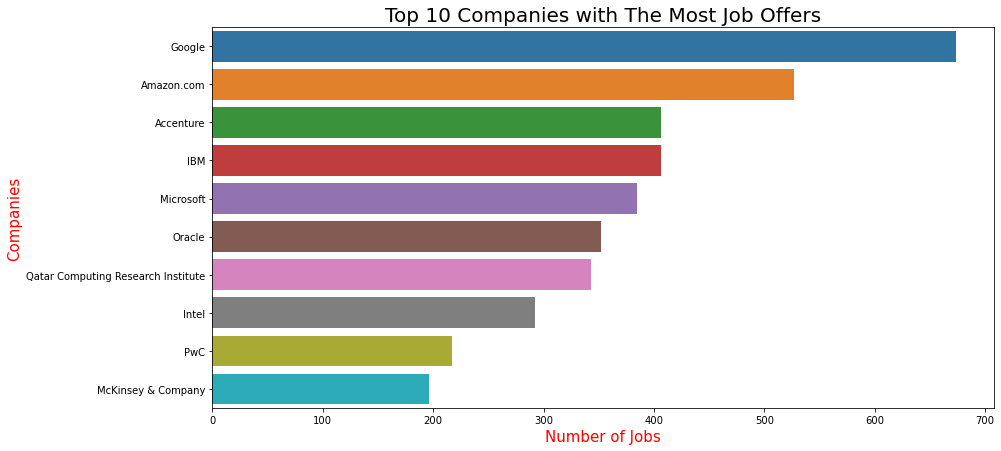

In [20]:
fig, bars=plt.subplots(figsize=(14,7))
bars = sns.barplot(data=companies_with_more_jobs, x="JobTitle", y="Company", orient='h')
bars.set_title("Top 10 Companies with The Most Job Offers", fontsize=20)
bars.set_xlabel("Number of Jobs", fontsize=15, color="red")
bars.set_ylabel("Companies", fontsize=15, color="red")

### Top 10 Cities with The Most Job Offers

We'll group the data by the 'Location' column, and count how many jobs are offered in that location. The result will be assigned into a new dataframe as well.

In [21]:
cities_with_more_jobs = data_science_filtered.groupby(["Location"]).JobTitle.count()
cities_with_more_jobs = cities_with_more_jobs.reset_index(name="JobTitle")
cities_with_more_jobs = cities_with_more_jobs.sort_values(["JobTitle"], ascending=False)
cities_with_more_jobs = cities_with_more_jobs.head(10)

In [22]:
cities_with_more_jobs = cities_with_more_jobs.reset_index()
cities_with_more_jobs = cities_with_more_jobs.drop(['index'], axis=1)

This is the result in dataframe form

In [23]:
cities_with_more_jobs

,Location,JobTitle
0,London,618
1,Singapore,539
2,Luxembourg,457
3,Dublin,454
4,Doha,446
5,กรุงเทพมหานคร,402
6,Karachi,386
7,Москва,370
8,"Zürich, ZH",299
9,Hong Kong,290


This is the visualization in bar plot form

Text(0, 0.5, 'Number of Jobs')

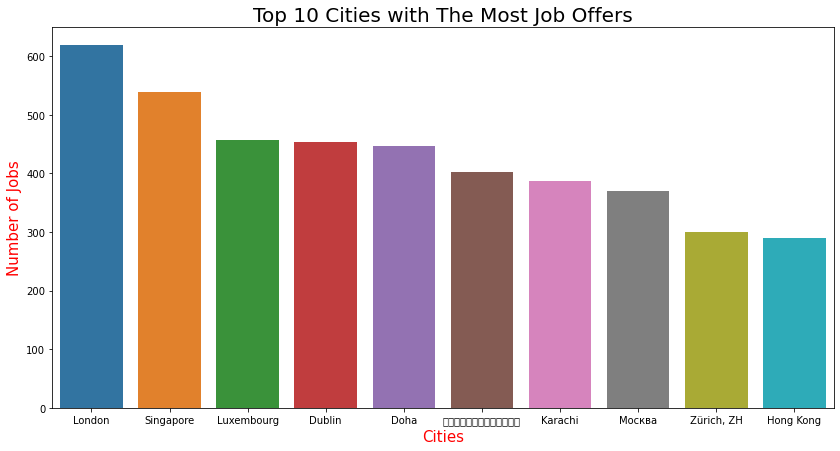

In [24]:
fig, bars=plt.subplots(figsize=(14,7))
bars = sns.barplot(data=cities_with_more_jobs, x="Location", y="JobTitle")
bars.set_title("Top 10 Cities with The Most Job Offers", fontsize=20)
bars.set_xlabel("Cities", fontsize=15, color="red")
bars.set_ylabel("Number of Jobs", fontsize=15, color="red")

### Top 10 Cities with The Most Data Scientist Job Offers

As we've seen in the "Top 10 Most Wanted Data Science Related Jobs" data, the most wanted job by companies is data scientist. We'll be looking at cities with the most data scientist job offers so those who are interested to apply for data scientist job can have general knowledge of the locations with the most opportunities available.

We'll filter the "JobTitle" column so it will only look for "Data Scientist" in that column. Then, we'll create a new dataframe consist of just the "JobTitle" that have "Data Scientist" in it, and the location of those jobs.  

In [25]:
city_with_more_ds = data_science_filtered.loc[data_science_filtered['JobTitle'] == "Data Scientist"][['JobTitle', 'Location']]

We'll group the data in our newly created dataframe by the 'Location' column, and count how many 'Data Scientist' job title are in those locations.

In [26]:
cities_with_more_ds = city_with_more_ds.groupby(['Location']).JobTitle.count()
cities_with_more_ds = cities_with_more_ds.reset_index(name="JobTitle")
cities_with_more_ds = cities_with_more_ds.sort_values(["JobTitle"], ascending=False)
cities_with_more_ds = cities_with_more_ds.head(10)

In [27]:
cities_with_more_ds = cities_with_more_ds.reset_index()
cities_with_more_ds = cities_with_more_ds.drop(['index'], axis=1)

And here is the result in dataframe form

In [28]:
cities_with_more_ds

,Location,JobTitle
0,London,105
1,"Bengaluru, Karnataka",46
2,Singapore,35
3,Москва,29
4,"Hyderabad, Telangana",17
5,"Toronto, ON",16
6,Western Cape,14
7,"Vancouver, BC",14
8,Dubai,13
9,Dublin,12


This is the result visualized in bar plot form

Text(0, 0.5, 'Cities')

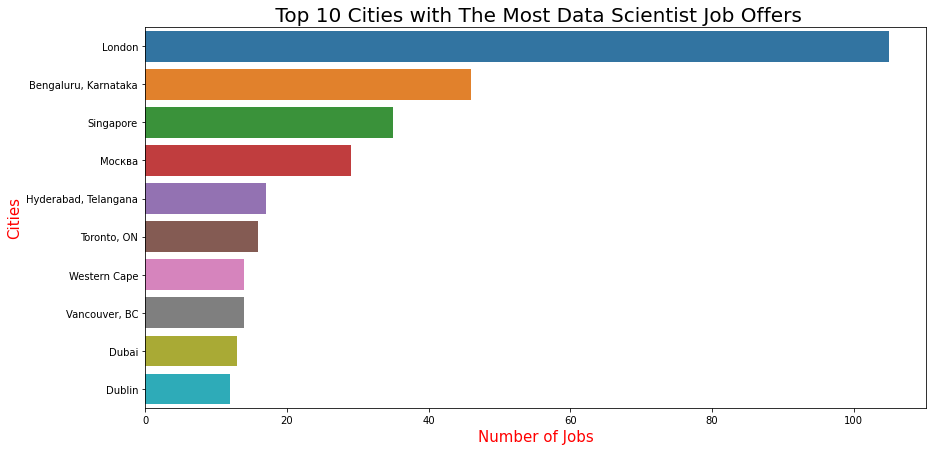

In [29]:
fig, bars=plt.subplots(figsize=(14,7))
bars = sns.barplot(data=cities_with_more_ds, x="JobTitle", y="Location", orient='h')
bars.set_title(" Top 10 Cities with The Most Data Scientist Job Offers", fontsize=20)
bars.set_xlabel("Number of Jobs", fontsize=15, color="red")
bars.set_ylabel("Cities", fontsize=15, color="red")

### Top 10 Google's Most Wanted Jobs

Google ranked number 1 in the "Top 10 Companies with The Most Job Offers". We'll take a look at 10 jobs that's currently wanted the most by Google so people who are interested to work at Google can have general understanding of which role to apply.

We'll filter the 'Company' column so it will only look for "Google" in that column. Then, we'll create a new dataframe consist of just the 'Company' that have "Google" in it, and the 'JobTitle' offered by them.

In [30]:
job_in_google = data_science_filtered.loc[data_science_filtered['Company'] == "Google"][['JobTitle', 'Company']]

We'll group the data by 'JobTitle' column, and count how many of those jobs are offered by Google.

In [31]:
jobs_in_google = job_in_google.groupby(['JobTitle']).Company.count()
jobs_in_google = jobs_in_google.reset_index(name="Company")
jobs_in_google = jobs_in_google.sort_values(["Company"], ascending=False)
jobs_in_google = jobs_in_google.head(10)

In [32]:
jobs_in_google = jobs_in_google.reset_index()
jobs_in_google = jobs_in_google.drop(['index'], axis=1)

This is the result in dataframe form

In [33]:
jobs_in_google

,JobTitle,Company
0,Software Engineering/Site Reliability Engineer...,33
1,Software Engineer (English),29
2,"Engineering Manager, Android Media",28
3,"Software Engineer, Android OS",28
4,"Software Engineering Intern, PhD 2018",26
5,Software Engineer,19
6,"Summer Trainee Engineering Program, STEP 2018",18
7,"High-level Synthesis Design Engineer, Consumer...",16
8,"iOS Software Engineer, Mobile Applications",15
9,Full Stack Software Engineer,15


This is the result visualized in barplot form

Text(0, 0.5, 'Job Title')

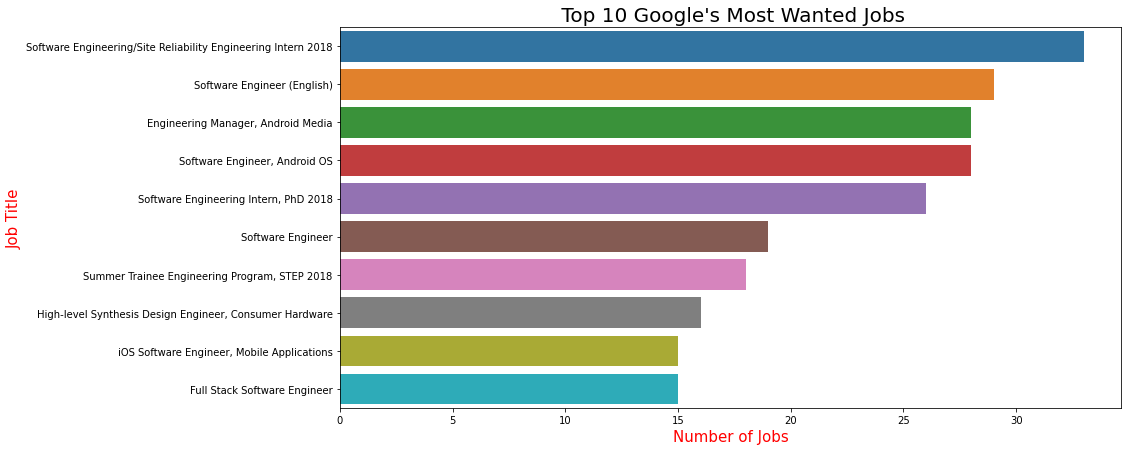

In [34]:
fig, bars=plt.subplots(figsize=(14,7))
bars = sns.barplot(data=jobs_in_google, x="Company", y="JobTitle", orient='h')
bars.set_title(" Top 10 Google's Most Wanted Jobs", fontsize=20)
bars.set_xlabel("Number of Jobs", fontsize=15, color="red")
bars.set_ylabel("Job Title", fontsize=15, color="red")

## Asking and Answering Questions

In this section we'll ask some interesting questions about our dataset and find the answer by computing the results using Numpy / Pandas and also by plotting graphs using Matplotlib/Seaborn



#### How many companies in total that are looking for data science related jobs?

With this result, we can determine whether working in the data science industry is a promising prospect or not.

In [35]:
total_companies = data_science_filtered["Company"].nunique()

In [36]:
print("Total number of companies offering data science jobs:", total_companies)

Total number of companies offering data science jobs: 2951


#### What is the percentage ratio between job offers from the "top 10 companies with the most job offers" and other companies?

We can see whether the data science job market is dominated by the "top 10 companies with the most job offer" or it's an open market for other companies as well.

With the "top 10 companies with the most job offer" data, we know which companies are in that top 10, and we can put their names in a list. Meanwhile, we'll also create a new dataframe consist of only job titles and companies because those two will be our main focus.

In [80]:
top10 = ['Google', 'Amazon.com', 'Accenture', 'IBM', 'Microsoft', 'Oracle', 'Qatar Computing Research Institute', 'Intel', 
         'PwC', 'McKinsey & Company']

job_ratio = data_science_filtered[['JobTitle', 'Company']]

We'll create a function that will check the 'company' column, and will return "Top 10 Companies" if the data in the column matched with one of the data in our list, and will return "Other Companies" if the data in the column doesn't matched with the data in our list

In [81]:
def find (x):
    if x in top10:
        return "Top 10 Companies"
    else:
        return "Other Companies"

We'll create a new column to contain the result from our function. The "apply" is used to apply the function that we've made before into all of the data inside a certain column. 

In [82]:
job_ratio['Company_grouped'] = job_ratio['Company'].apply(find)

We'll group the data by 'Company_grouped' column, and count how many jobs are offered by them.

In [83]:
jobs_ratio = job_ratio.groupby(['Company_grouped']).JobTitle.count()
jobs_ratio = jobs_ratio.reset_index(name="JobTitle")

This is the result of how many jobs are offered by the "top 10 companies" and the others

In [84]:
jobs_ratio

,Company_grouped,JobTitle
0,Other Companies,19661
1,Top 10 Companies,3798


This is the percentage ratio of the result, visualized in pie chart form.

<AxesSubplot:title={'center':'Job Offers Percentage Ratio'}, ylabel='Percentage Ratio'>

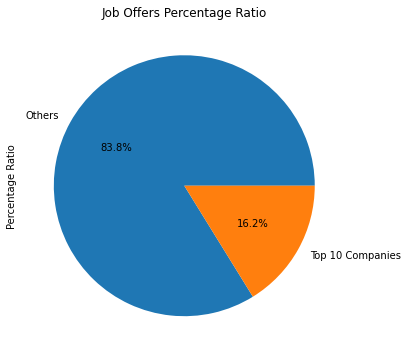

In [85]:
jobs_ratio['JobTitle'].rename({0: 'Others', 1: 'Top 10 Companies'}).plot(kind='pie', figsize=(14,6), title='Job Offers Percentage Ratio', 
                                                                           ylabel='Percentage Ratio', autopct='%1.1f%%')

#### How many types of data science related jobs offered in this dataset?

With this result, we'll be able to know how diverse the jobs are in this industry.

In [102]:
total_jobs = data_science_filtered["JobTitle"].nunique()

In [103]:
print("Total number of data science job types in all companies:", total_jobs)

Total number of data science job types in all companies: 10060


#### What is the percentage ratio between data scientist job and other jobs?

From the "top 10 most wanted data science related jobs" list, we can see that the data scientist role is leading, and by quite a fine margin as well compared to other jobs in that list. With this result, we'll know whether the data scientist role is also dominating the whole data science related jobs market as well.

We'll create a new dataframe consist of only job titles and companies because those two will be our main focus.

In [72]:
ds_ratio = data_science_filtered[['JobTitle', 'Company']]

We'll create a function that will check the 'JobTitle' column, and will return "Data Scientist" if the data in the column is "Data Scientist", and will return "Other Jobs" if the data in the column isn't "Data Scientist".

In [73]:
def findjob (x):
    if x == "Data Scientist":
        return x
    else:
        return "Other Jobs"

We'll create a new column to contain the result from our function. The "apply" is used to apply the function that we've made before into all of the data inside a certain column.

In [74]:
ds_ratio['ds_grouped'] = ds_ratio['JobTitle'].apply(findjob)

We'll group the data by 'ds_grouped' column, and count how many jobs are marked as "Data Scientist" and "Other Jobs".

In [77]:
ds_ratio = ds_ratio.groupby(['ds_grouped']).JobTitle.count()
ds_ratio = ds_ratio.reset_index(name="JobTitle")

This is the result of how many "Data Scientist" jobs wanted by companies compared to others

In [78]:
ds_ratio

,ds_grouped,JobTitle
0,Data Scientist,638
1,Other Jobs,22821


This is the percentage ratio of the result, visualized in pie chart form.

<AxesSubplot:title={'center':'Data Scientist vs Other Jobs Percentage Ratio'}, ylabel='Percentage Ratio'>

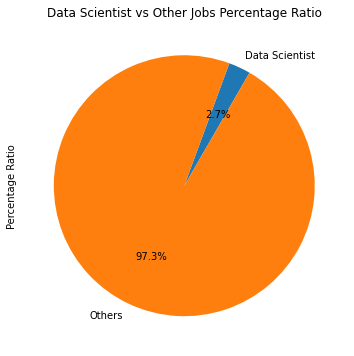

In [91]:
ds_ratio['JobTitle'].rename({0: 'Data Scientist', 1: 'Others'}).plot(kind='pie', figsize=(14,6), title='Data Scientist vs Other Jobs Percentage Ratio', ylabel = 'Percentage Ratio', 
                                                                     autopct='%1.1f%%', startangle=60)

#### What is the percentage ratio between the "top 10 most wanted jobs" and other jobs?

We've just seen that data scientist job offers are just a small fraction in the data science jobs market. But what about the "top 10 most wanted jobs"?

With the "top 10 most wanted data science related jobs" data, we know which jobs are in that top 10, and we can put their names in a list. Meanwhile, we'll also create a new dataframe consist of only job titles and companies because those two will be our main focus.

In [92]:
job10 = ['Data Scientist','Data Analyst','Software Engineer','Data Engineer','Business Analyst','Big Data Engineer',
         'Senior Data Scientist','Senior Engineer - DevOps','Director, Data & Analytics','Project Manager']

mwjob_ratio = data_science_filtered[['JobTitle', 'Company']]

We'll create a function that will check the 'JobTitle' column, and will return "Top 10 Jobs" if the data in the column matched with one of the data in our list, and will return "Other Jobs" if the data in the column doesn't matched with the data in our list.

In [93]:
def find2 (x):
    if x in job10:
        return "Top 10 Jobs"
    else:
        return "Other Jobs"

We'll create a new column to contain the result from our function. The "apply" is used to apply the function that we've made before into all of the data inside a certain column.

In [94]:
mwjob_ratio['Jobs_grouped'] = mwjob_ratio['JobTitle'].apply(find2)

We'll group the data by 'Jobs_grouped' column, and count how many jobs are marked as "Top 10 Jobs" and "Other Jobs".

In [98]:
mwjobs_ratio = mwjob_ratio.groupby(['Jobs_grouped']).JobTitle.count()
mwjobs_ratio = mwjobs_ratio.reset_index(name="JobTitle")

This is the result of how many of the "top 10 jobs" wanted by companies compared to others

In [99]:
mwjobs_ratio

,Jobs_grouped,JobTitle
0,Other Jobs,21846
1,Top 10 Jobs,1613


This is the percentage ratio of the result, visualized in pie chart form.

<AxesSubplot:title={'center':'Most Wanted Jobs Percentage Ratio'}, ylabel='Percentage Ratio'>

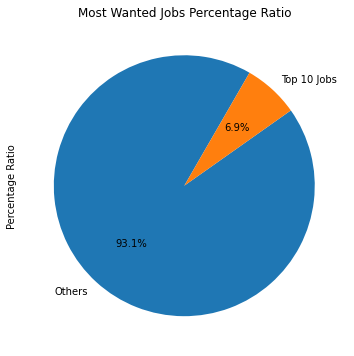

In [101]:
mwjobs_ratio['JobTitle'].rename({0: 'Others', 1: 'Top 10 Jobs'}).plot(kind='pie', figsize=(14,6), title='Most Wanted Jobs Percentage Ratio', 
                                                                           ylabel='Percentage Ratio', autopct='%1.1f%%', startangle=60)

#### How many locations in total that offer data science related jobs?

With this result, we can determine whether data science related job offers are centralized in certain locations, or widely scattered across the world.

In [104]:
number_of_cities = data_science_filtered["Location"].nunique()
print("Total number of cities is:", number_of_cities)

Total number of cities is: 1601


#### What is the percentage ratio between the "top 10 cities with the most job offers" and other cities?
From the result above, we know that there are job opportunities in many locations. But, it's still unclear whether the "top 10 cities with the most job offers" are also have the most job offers compared to the whole other locations in this dataset or not.

With the "top 10 cities with the most job offers" data, we know which cities are in that top 10, and we can put their names in a list. Meanwhile, we'll also create a new dataframe consist of only job titles and locations because those two will be our main focus.

In [108]:
loc10 = ['London', 'Singapore', 'Luxembourg', 'Dublin', 'Doha', 'กรุงเทพมหานคร', 'Karachi', 'Москва', 'Zürich, ZH', 
         'Hong Kong']

locjob_ratio = data_science_filtered[['JobTitle', 'Location']]

We'll create a function that will check the 'Location' column, and will return "Top 10 Cities" if the data in the column matched with one of the data in our list, and will return "Other Cities" if the data in the column doesn't matched with the data in our list.

In [109]:
def find3 (x):
    if x in loc10:
        return "Top 10 Cities"
    else:
        return "Other Cities"

We'll create a new column to contain the result from our function. The "apply" is used to apply the function that we've made before into all of the data inside a certain column.

In [110]:
locjob_ratio['Loc_grouped'] = locjob_ratio['Location'].apply(find3)

We'll group the data by 'Loc_grouped' column, and count how many jobs are offered in those locations.

In [114]:
locjobs_ratio = locjob_ratio.groupby(['Loc_grouped']).JobTitle.count()
locjobs_ratio = locjobs_ratio.reset_index(name="JobTitle")

This is the result of how many jobs are offered in the "top 10 cities" and the others

In [115]:
locjobs_ratio

,Loc_grouped,JobTitle
0,Other Cities,19198
1,Top 10 Cities,4261


This is the percentage ratio of the result, visualized in pie chart.

<AxesSubplot:title={'center':'Cities With The Most Job Offers Percentage Ratio'}, ylabel='Percentage Ratio'>

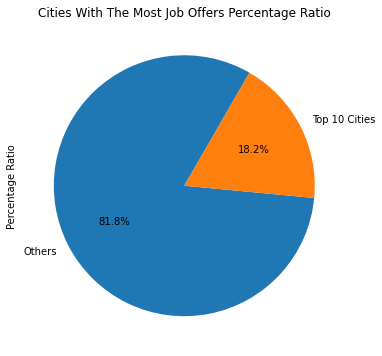

In [116]:
locjobs_ratio['JobTitle'].rename({0: 'Others', 1: 'Top 10 Cities'}).plot(kind='pie', figsize=(14,6), title='Cities With The Most Job Offers Percentage Ratio', 
                                                                           ylabel='Percentage Ratio', autopct='%1.1f%%', startangle=60)

## Inferences

Here are the summary of the data analysis in this notebook:

#### Data Science Related Jobs:
From the "top 10 most wanted jobs" chart, we can see that Data Scientist is the job wanted by most companies and the difference is quite huge as well compared to other jobs in the chart. But that doesn't mean Data Scientist is the only job wanted by companies. In fact, job offers for Data Scientist are just 2.7% out of the whole data science related job offers. Not only that, Data Scientist is not even on the top 10 most wanted jobs from Google, the company with the most data science related job offers. So, that means you don't have to only be Data Scientist if you want to build a career in data science. There are a lot of other opportunities that you can explore in this industry.

#### Job Offers From Companies:
As expected, companies who offer the most data science related jobs are well known "Tech Giants", like Google, Amazon, etc. and followed by some established business consulting companies, like Accenture and McKinsey & Company. Even though they offered a lot of data science related jobs, that doesn't make these companies the "ruler" of the data science job market. Based on the data, their job offers are just 16.2% out of all data science jobs offered by over 2000 companies in the world. 

#### Job Offers Locations:
Based on the "top 10 cities with the most job offers" chart, London appears to be the cities with the most job offers available. But the difference is not that big among other locations as well, which is a good news for those who are seeking for opportunity in data science as it means that data science related jobs are wanted by companies in various locations around the world. 

## Conclusion

With so many and diverse jobs available, great companies are looking for talent, and opportunities in many locations, it's safe to say that working in data science is an exciting prospect. Not only for now, but also for many years to come in the future.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
